# **پیش گزارش**

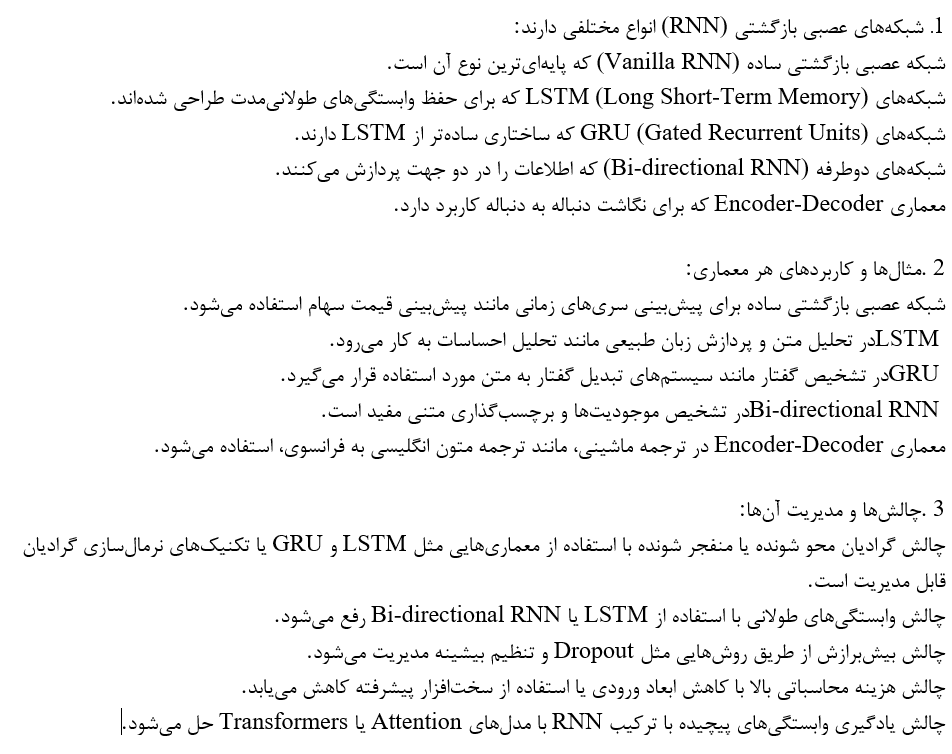

# **آزمایش**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

VOCAB_SIZE = 20000
MAXLEN = 500
BATCH_SIZE = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

input_train = sequence.pad_sequences(input_train, maxlen=MAXLEN)
input_test = sequence.pad_sequences(input_test, maxlen=MAXLEN)




17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def build_model(rnn_cell):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE, 32),
        rnn_cell(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

rnn_model = build_model(tf.keras.layers.SimpleRNN)
lstm_model = build_model(tf.keras.layers.LSTM)
gru_model = build_model(tf.keras.layers.GRU)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = rnn_model.fit(input_train, y_train,
                        epochs=10,
                        batch_size=BATCH_SIZE,
                        validation_split=0.2,
                        callbacks=[callback])

results = rnn_model.evaluate(input_test, y_test)
print(f'Test Loss: {results[0]} - Test Accuracy: {results[1]}')


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5614 - loss: 0.6737 - val_accuracy: 0.7428 - val_loss: 0.5082
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8223 - loss: 0.4021 - val_accuracy: 0.8178 - val_loss: 0.4263
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9270 - loss: 0.1995 - val_accuracy: 0.8096 - val_loss: 0.4571
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9593 - loss: 0.1202 - val_accuracy: 0.8272 - val_loss: 0.4979
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8276 - loss: 0.4861
Test Loss: 0.48659059405326843 - Test Accuracy: 0.8280799984931946


In [ ]:
history_LSTM = lstm_model.fit(input_train, y_train,
                              epochs=10,
                              batch_size=BATCH_SIZE,
                              validation_split=0.2,
                              callbacks=[callback])

results_LSTM = lstm_model.evaluate(input_test, y_test)
print(f'Test Loss: {results_LSTM[0]} - Test Accuracy: {results_LSTM[1]}')


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6747 - loss: 0.5720 - val_accuracy: 0.8522 - val_loss: 0.3468
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9028 - loss: 0.2572 - val_accuracy: 0.8734 - val_loss: 0.3081
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9474 - loss: 0.1522 - val_accuracy: 0.8758 - val_loss: 0.3104
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9672 - loss: 0.1046 - val_accuracy: 0.8594 - val_loss: 0.3654
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8500 - loss: 0.3920
Test Loss: 0.39671438932418823 - Test Accuracy: 0.8484799861907959


In [ ]:
history_GRU= gru_model.fit(input_train, y_train,
                              epochs=10,
                              batch_size=BATCH_SIZE,
                              validation_split=0.2,
                              callbacks=[callback])

results_GRU = gru_model.evaluate(input_test, y_test)
print(f'Test Loss: {results_GRU[0]} - Test Accuracy: {results_GRU[1]}')


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6619 - loss: 0.5773 - val_accuracy: 0.8506 - val_loss: 0.3496
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8994 - loss: 0.2607 - val_accuracy: 0.8434 - val_loss: 0.3618
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8410 - loss: 0.3662
Test Loss: 0.3615158200263977 - Test Accuracy: 0.843999981880188


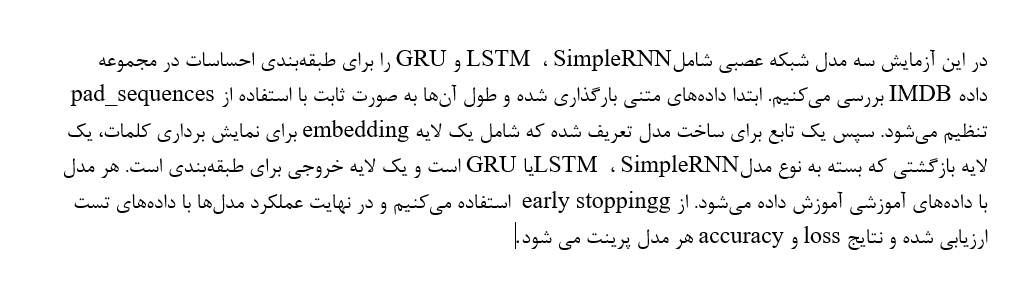

# **تمرین**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url)

temperatures = data['Temp'].values
scaler = MinMaxScaler(feature_range=(0, 1))
temperatures_scaled = scaler.fit_transform(temperatures.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
SEQ_LENGTH = 30  #سی روز
X, y = create_sequences(temperatures_scaled, SEQ_LENGTH)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
def build_model(rnn_layer):
    model = Sequential([
        rnn_layer(32, input_shape=(SEQ_LENGTH, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

rnn_model = build_model(SimpleRNN)
lstm_model = build_model(LSTM)
gru_model = build_model(GRU)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# RNN
history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[callback])
results_rnn = rnn_model.evaluate(X_test, y_test)
print(f'RNN - Test Loss: {results_rnn[0]} - Test MAE: {results_rnn[1]}')

# LSTM
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[callback])
results_lstm = lstm_model.evaluate(X_test, y_test)
print(f'LSTM - Test Loss: {results_lstm[0]} - Test MAE: {results_lstm[1]}')

# GRU
history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[callback])
results_gru = gru_model.evaluate(X_test, y_test)
print(f'GRU - Test Loss: {results_gru[0]} - Test MAE: {results_gru[1]}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0182 - mae: 0.1058 - val_loss: 0.0112 - val_mae: 0.0823
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mae: 0.0848 - val_loss: 0.0097 - val_mae: 0.0762
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mae: 0.0812 - val_loss: 0.0093 - val_mae: 0.0750
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mae: 0.0783 - val_loss: 0.0091 - val_mae: 0.0741
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mae: 0.0766 - val_loss: 0.0089 - val_mae: 0.0737
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mae: 0.0764 - val_loss: 0.0094 - val_mae: 0.0759
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - mae: 0.0743 - val_loss: 0.0094 - val_mae: 0.0755
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mae: 0.0710
RNN - Test Loss: 0.007931661792099476 - Test MAE: 0.07048068940639496
Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.